<a href="https://colab.research.google.com/github/starkworld/Future-Sales-Prediction/blob/master/Future_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple LSTM model for Time series problem. It involves in single layer LSTM model and with 100 epochs and 4096 batch size. Generally, First data cleaning and preprocessing has done. Later feed the data to LSTM model to predict the results of items for next month

# Importing Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

from datetime import datetime, date
from dateutil.relativedelta import relativedelta

from sklearn.preprocessing import StandardScaler


from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop

# Loading Dataset

In [34]:
item_cat = pd.read_csv('/content/drive/My Drive/competitive-data-science-predict-future-sales/item_categories.csv')
items = pd.read_csv('/content/drive/My Drive/competitive-data-science-predict-future-sales/items.csv')
train = pd.read_csv('/content/drive/My Drive/competitive-data-science-predict-future-sales/sales_train.csv')
shops = pd.read_csv('/content/drive/My Drive/competitive-data-science-predict-future-sales/shops.csv')
test = pd.read_csv('/content/drive/My Drive/competitive-data-science-predict-future-sales/test.csv').set_index('ID')
items = items.drop(['item_name'], axis=1)

## Printing range of columns of datasets

In [35]:
print('Train')
for i in train.columns.values:
  print(f"{i}, {train[i].min()}, {train[i].max()}")

print('Items')
for j in items.columns.values:
  print(f'{j}, {items[j].min()}, {items[j].max()}')

print('Test')
for t in test.columns.values:
  print(f"{t}, {test[t].min()}, {test[t].max()}")

Train
date, 01.01.2013, 31.12.2014
date_block_num, 0, 33
shop_id, 0, 59
item_id, 0, 22169
item_price, -1.0, 307980.0
item_cnt_day, -22.0, 2169.0
Items
item_id, 0, 22169
item_category_id, 0, 83
Test
shop_id, 2, 59
item_id, 30, 22167


## Showing the outliers of dataset

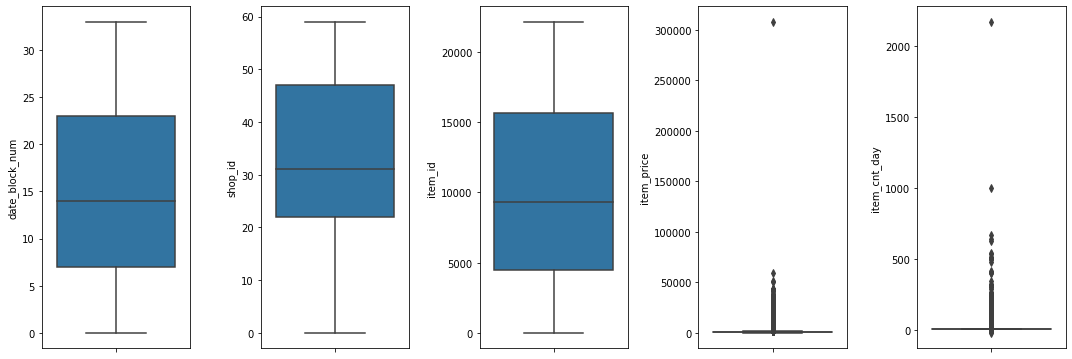

In [36]:
columns = [ 'date_block_num', 'shop_id', 'item_id',  'item_price', 'item_cnt_day']
no_of_col = len(columns)
plt.figure(figsize=(3*no_of_col, 10))
for cat in range(0, no_of_col):
  plt.subplot(2, no_of_col, cat+1)
  sns.boxplot(train[columns[cat]], orient='v')
  plt.tight_layout()

### We will remove outliers which are greater than 10000 in item price and greater than 1000 in items day count

In [37]:
train = train[(train['item_price']<100000) & (train['item_price']>=0)]
train = train[(train['item_cnt_day']<1000) & (train['item_cnt_day']>=0)]

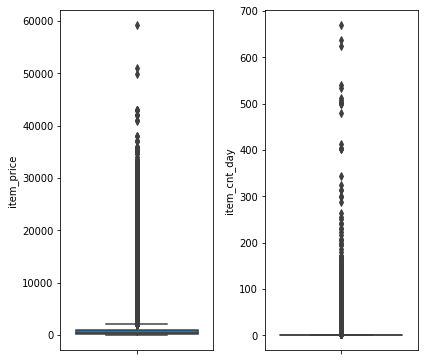

In [38]:
columns = ['item_price', 'item_cnt_day']

no_of_col = len(columns)
plt.figure(figsize=(3*no_of_col, 10))
for cat in range(0, no_of_col):
  plt.subplot(2, no_of_col, cat+1)
  sns.boxplot(train[columns[cat]], orient='v')
  plt.tight_layout()

### Describing the correlation between independent variables and independent variable

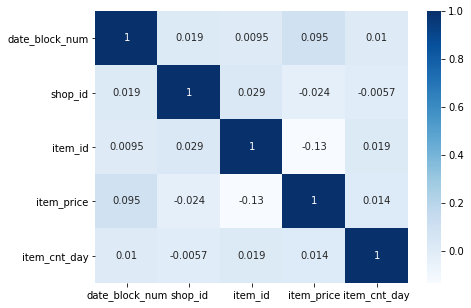

In [39]:
columns = [ 'date_block_num', 'shop_id', 'item_id',  'item_price', 'item_cnt_day']
corr = train[columns].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True, cmap='Blues')

Above heatmap indicates that dark coloured boxes represent positively correlated lighter boxes represent negitively correlated

## Converting date to string

In [40]:
train['date'] = pd.to_datetime(train['date'],format = '%d.%m.%Y')

In [41]:
new_train = train.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum')

In [42]:
new_train.reset_index(inplace = True)

In [43]:
new_train = pd.merge(test,new_train,on = ['item_id','shop_id'],how = 'left')

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [44]:
new_train.fillna(0,inplace = True)

In [45]:
new_train.drop(['shop_id','item_id'],inplace = True, axis = 1)

In [46]:

x_train = np.expand_dims(new_train.values[:,:-1],axis = 2)

y_train = new_train.values[:,-1:]


x_test = np.expand_dims(new_train.values[:,1:],axis = 2)


print(x_train.shape,y_train.shape,x_test.shape)

(214200, 33, 1) (214200, 1) (214200, 33, 1)


## Importing LSTM model and constructing LSTM netwoek of single layer

Traninng model with train data

In [71]:
model = Sequential()
model.add(LSTM(units = 64,input_shape = (33,1)))

model.add(Dense(10, activation='relu'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(x_train, y_train, epochs = 100, batch_size = 4096)

Epoch 1/100
53/53 [==============================] - 1s 17ms/step - loss: 7.0531
Epoch 2/100
53/53 [==============================] - 1s 16ms/step - loss: 6.8186
Epoch 3/100
53/53 [==============================] - 1s 15ms/step - loss: 6.6414
Epoch 4/100
53/53 [==============================] - 1s 15ms/step - loss: 6.5323
Epoch 5/100
53/53 [==============================] - 1s 16ms/step - loss: 6.4581
Epoch 6/100
53/53 [==============================] - 1s 15ms/step - loss: 6.3972
Epoch 7/100
53/53 [==============================] - 1s 15ms/step - loss: 6.3473
Epoch 8/100
53/53 [==============================] - 1s 16ms/step - loss: 6.2986
Epoch 9/100
53/53 [==============================] - 1s 15ms/step - loss: 6.2554
Epoch 10/100
53/53 [==============================] - 1s 15ms/step - loss: 6.2114
Epoch 11/100
53/53 [==============================] - 1s 15ms/step - loss: 6.1715
Epoch 12/100
53/53 [==============================] - 1s 15ms/step - loss: 6.1349
Epoch 13/100
53/53 [=====

Predicting the result

In [72]:
submit_model = model.predict(x_test)